In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def add_proportion(group):
    # adds the proportion of a name for a given year
    births = group.births.astype(float)
    group['prop'] = (births/births.sum()) * 100

    return group

In [3]:
def get_top_100(group):
    return group.sort_values(by='prop', ascending=False)[:100]

In [14]:
pieces = []

# Open the text file for each year, append it to a list
for year in range(1880, 2011):
    path = 'ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=['name', 'sex', 'births'])
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single data frame, add the prop % column
names = pd.concat(pieces, ignore_index=True)
girls = names[names.sex == 'F']
boys = names[names.sex == 'M']
girls = girls.groupby(['year', 'sex']).apply(add_proportion)
boys = boys.groupby(['year', 'sex']).apply(add_proportion)

print girls[:10]
print boys[:10]


        name sex  births  year      prop
0       Mary   F    7065  1880  7.764334
1       Anna   F    2604  1880  2.861759
2       Emma   F    2003  1880  2.201268
3  Elizabeth   F    1939  1880  2.130933
4     Minnie   F    1746  1880  1.918829
5   Margaret   F    1578  1880  1.734199
6        Ida   F    1472  1880  1.617707
7      Alice   F    1414  1880  1.553966
8     Bertha   F    1320  1880  1.450661
9      Sarah   F    1288  1880  1.415493
        name sex  births  year      prop
942     John   M    9655  1880  8.738110
943  William   M    9533  1880  8.627696
944    James   M    5927  1880  5.364141
945  Charles   M    5348  1880  4.840126
946   George   M    5126  1880  4.639208
947    Frank   M    3242  1880  2.934123
948   Joseph   M    2632  1880  2.382051
949   Thomas   M    2534  1880  2.293358
950    Henry   M    2444  1880  2.211905
951   Robert   M    2416  1880  2.186564


In [6]:
# Let's find the most popular girls names in 1880

print names[0:10]

# Most popular in 2010

print names[1656946:1656956]

        name sex  births  year      prop
0       Mary   F    7065  1880  7.764334
1       Anna   F    2604  1880  2.861759
2       Emma   F    2003  1880  2.201268
3  Elizabeth   F    1939  1880  2.130933
4     Minnie   F    1746  1880  1.918829
5   Margaret   F    1578  1880  1.734199
6        Ida   F    1472  1880  1.617707
7      Alice   F    1414  1880  1.553966
8     Bertha   F    1320  1880  1.450661
9      Sarah   F    1288  1880  1.415493
             name sex  births  year      prop
1656946  Isabella   F   22731  2010  1.292261
1656947    Sophia   F   20477  2010  1.164121
1656948      Emma   F   17179  2010  0.976629
1656949    Olivia   F   16860  2010  0.958494
1656950       Ava   F   15300  2010  0.869807
1656951     Emily   F   14172  2010  0.805680
1656952   Abigail   F   14124  2010  0.802952
1656953   Madison   F   13070  2010  0.743032
1656954     Chloe   F   11656  2010  0.662645
1656955       Mia   F   10541  2010  0.599258


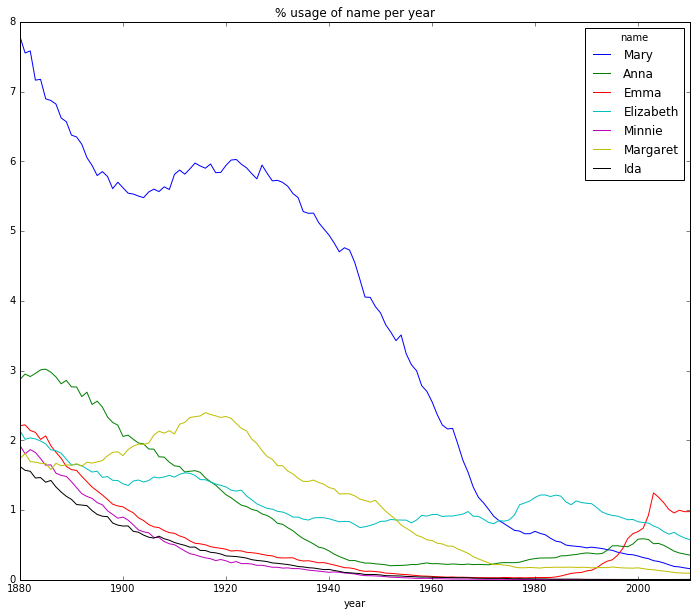

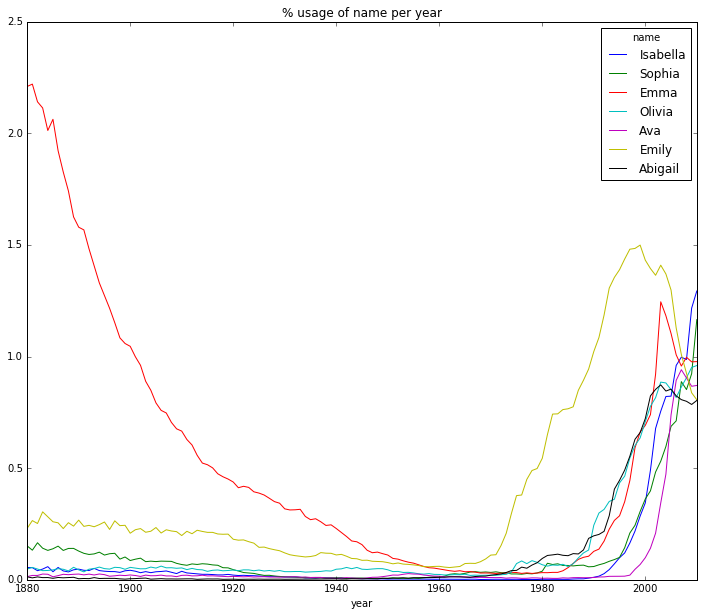

In [7]:
# Aggregates the data at the year and sex level vs total births (absolute numbers)
# total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

# Aggregates data at year/sex by proportion 
total_births = names.pivot_table('prop', index='year', columns='name', aggfunc=sum)


subset1880 = total_births[['Mary','Anna','Emma','Elizabeth','Minnie','Margaret','Ida']]
subset1880.plot(subplots=False, figsize=(12,10), grid=False, title="% usage of name per year")

subset2010 = total_births[['Isabella','Sophia','Emma','Olivia','Ava','Emily','Abigail']]
subset2010.plot(subplots=False, figsize=(12,10), grid=False, title="% usage of name per year")



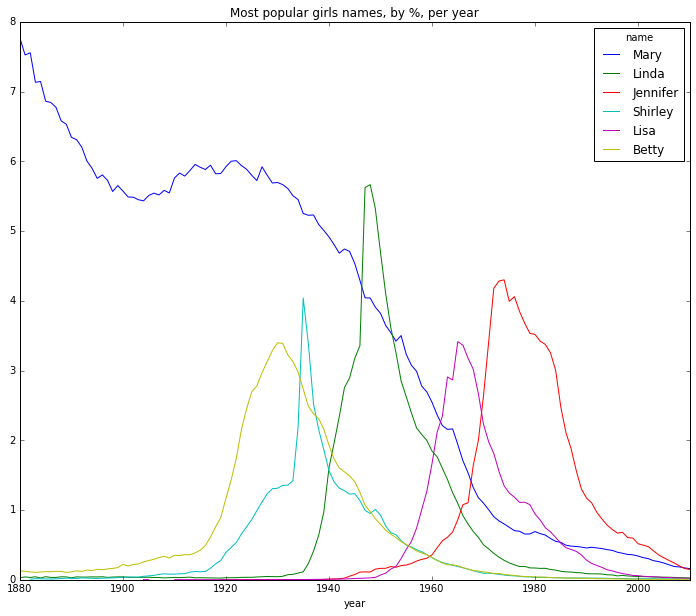

In [22]:
# Let's graph the most popular girls names, period.

popular_girls = girls.sort_values(by='prop', ascending=False)

total_girls = girls.pivot_table('prop', index='year', columns='name', aggfunc=sum)

most_pop_girls = total_girls[['Mary','Linda','Jennifer','Shirley','Lisa','Betty']]
most_pop_girls.plot(subplots=False, figsize=(12,10), grid=False, title="Most popular girls names, by %, per year")

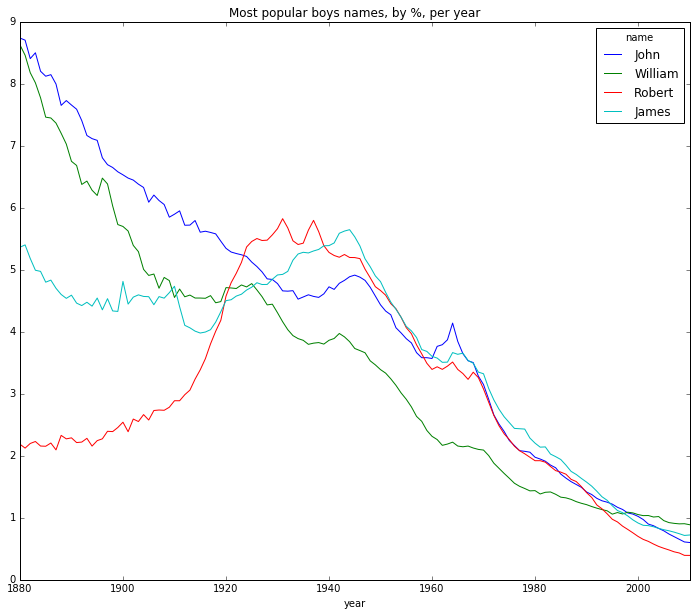

In [36]:
# Let's graph the most popular boys names, period.

popular_boys = boys.sort_values(by='prop', ascending=False)

total_boys = boys.pivot_table('prop', index='year', columns='name', aggfunc=sum)

most_pop_boys = total_boys[['John','William','Robert','James']]
most_pop_boys.plot(subplots=False, figsize=(12,10), grid=False, title="Most popular boys names, by %, per year")


In [103]:
# None of this shit works. Skip it.

'''
# Since boys only have 4 popular names, can we figure out how the ratios of names vary 
# from year to year within these 4?

# print the first 10 johns
print boys[boys['name'] =='John'][:10]
# print the first 1o entries for 1880
print boys[boys['year'] ==1880][:10]
births = boys.births.astype(float)

#print births[boys['name'] == 'John'].sum()
#print births[boys['name'] == 'William'].sum()
#print births[boys['name'] == 'Robert'].sum()
#print births[boys['name'] == 'James'].sum()

print boys.info()


   
for year in range(1880,2011):
    print boys[boys['year'] == year][boys['name'] == 'John'].births
    print boys[boys['year'] == year][boys['name'] == 'William'].births 
    print boys[boys['year'] == year][boys['name'] == 'Robert'].births 
    print boys[boys['year'] == year][boys['name'] == 'James'].births
    
    
    
#print totaljohns
    
  
def boy_prop(group):
    # adds the proportion of John/William/Robert/James for a given year
    births = group.births.astype(float)
    print births[births['name'] == 'John'].sum()
    
    group['Johns'] = ((births[births['name'] == 'John'])/(births[births['name'] == 'John'].sum() + 
                                      births[births['name'] == 'William'].sum() + 
                                      births[births['name'] == 'Robert'].sum() + 
                                      births[births['name'] == 'James'].sum()) * 100)
    return group
    


#four_boys = boys.groupby(['year', 'name']).apply(boy_prop)
                      
#four_boys[:10]
'''

"\n# Since boys only have 4 popular names, can we figure out how the ratios of names vary \n# from year to year within these 4?\n\n# print the first 10 johns\nprint boys[boys['name'] =='John'][:10]\n# print the first 1o entries for 1880\nprint boys[boys['year'] ==1880][:10]\nbirths = boys.births.astype(float)\n\n#print births[boys['name'] == 'John'].sum()\n#print births[boys['name'] == 'William'].sum()\n#print births[boys['name'] == 'Robert'].sum()\n#print births[boys['name'] == 'James'].sum()\n\nprint boys.info()\n\n\n   \nfor year in range(1880,2011):\n    print boys[boys['year'] == year][boys['name'] == 'John'].births\n    print boys[boys['year'] == year][boys['name'] == 'William'].births \n    print boys[boys['year'] == year][boys['name'] == 'Robert'].births \n    print boys[boys['year'] == year][boys['name'] == 'James'].births\n    \n    \n    \n#print totaljohns\n    \n  \ndef boy_prop(group):\n    # adds the proportion of John/William/Robert/James for a given year\n    births = 